# **Pie Charts**


Estimated time needed: **30** minutes


- In this lab, we will focus on visualizing data.

- The provided dataset will be loaded into pandas for analysis.

- Various pie charts will be created to:
   - Analyze developer preferences.
  
   - Identify technology usage trends.
    
- The lab aims to provide insights into key variables using visual representations.


## Objectives


In this lab we will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import prettytable
import numpy as np

**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



In [11]:
# Step 1: Download the dataset
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(url)
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Composition with Pie Charts


##### 1.1 Create a Pie Chart of the Top 5 Databases Respondents Want to Work With


In the survey data, the `DatabaseWantToWorkWith` column lists the databases that respondents wish to work with. Let’s visualize the top 5 most-desired databases in a pie chart.



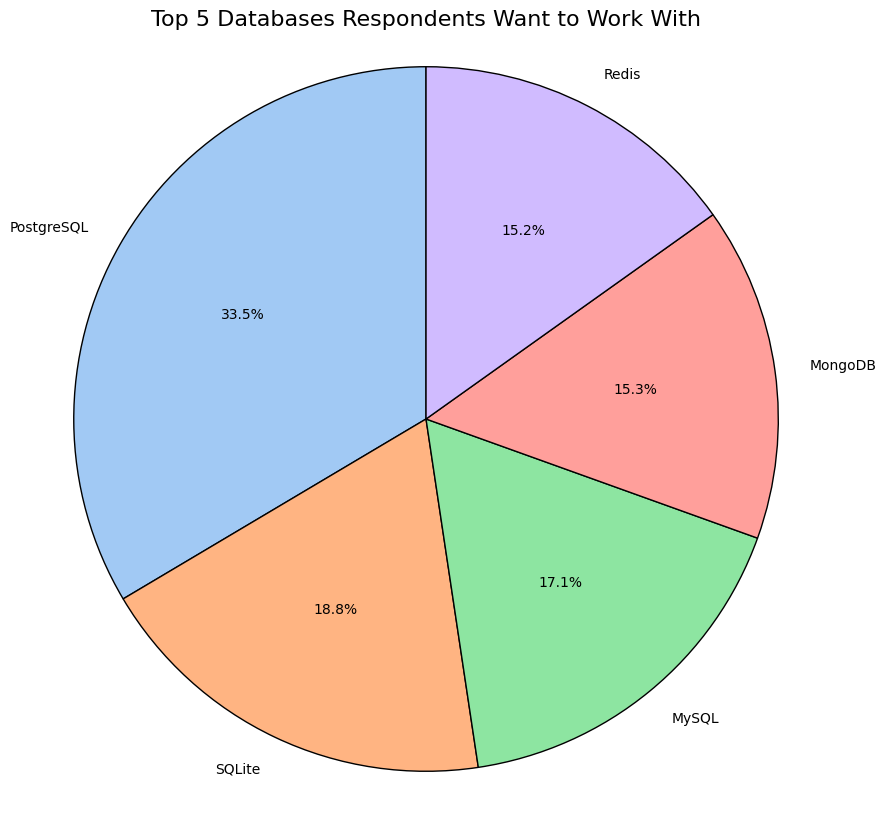

In [12]:
df['DatabaseWantToWorkWith'] = df['DatabaseWantToWorkWith'].fillna('')
df_exploded = df.assign(Database=df['DatabaseWantToWorkWith'].str.split(';')).explode('Database')
df_exploded['Database'] = df_exploded['Database'].str.strip()
df_exploded = df_exploded[df_exploded['Database'] != '']
df_clean = df_exploded.dropna(subset=['Database']).copy()
database_counts = df_clean['Database'].value_counts()
top_5_databases = database_counts.head(5)
plt.figure(figsize=(10, 10)) 
plt.pie(
                top_5_databases,
                labels=top_5_databases.index,
                autopct='%1.1f%%',
                startangle=90,
                colors=sns.color_palette('pastel'),
                wedgeprops={'edgecolor': 'black'}
            )
plt.title('Top 5 Databases Respondents Want to Work With', fontsize=16)
plt.axis('equal')
plt.show()

### Insight
- PostgreSQL is the standout leader, indicating a strong and growing preference for its advanced features, reliability, and open-source nature within the developer community.
- The top 5 includes a mix of traditional relational databases (PostgreSQL, MySQL, SQLite) and modern NoSQL/in-memory databases (MongoDB, Redis). This reflects the diverse needs and evolving landscape of data storage solutions in current development practices.

1.2 The `DevType` column lists the developer types for respondents. We’ll examine the distribution by showing the top 5 developer roles in a pie chart.

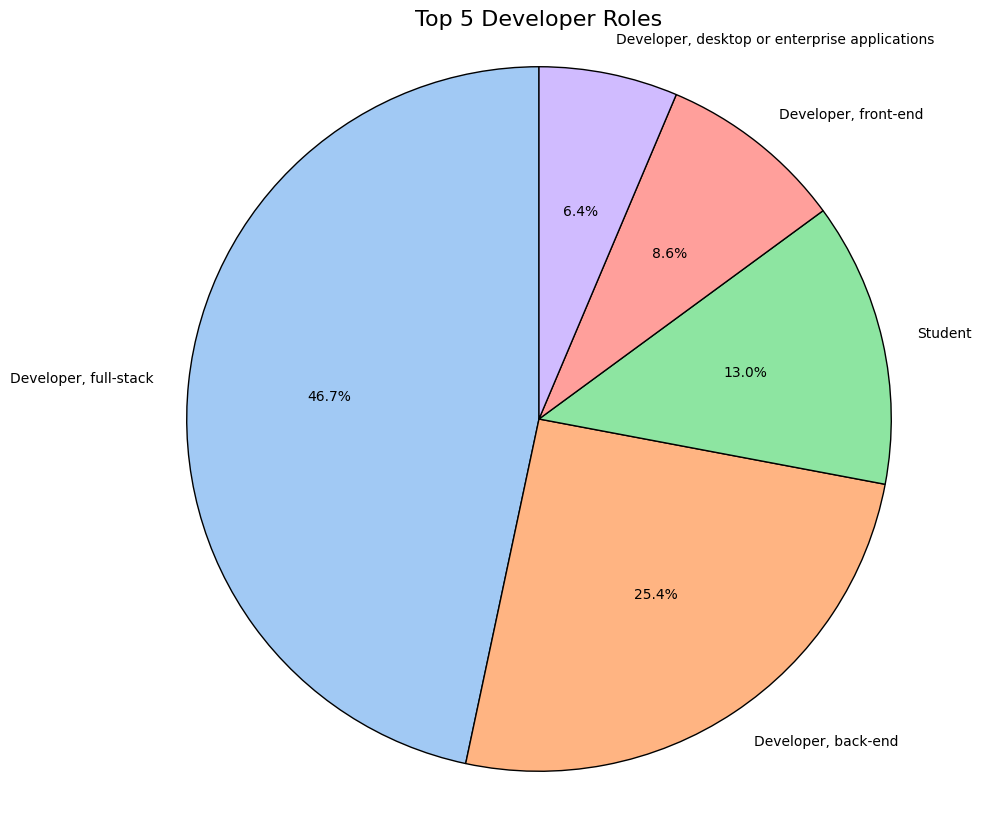

In [20]:
df['DevType'] = df['DevType'].fillna('')
df_exploded = df.assign(Role=df['DevType'].str.split(';')).explode('Role')
df_exploded['Role'] = df_exploded['Role'].str.strip()
df_exploded = df_exploded[df_exploded['Role'] != ''] 
df_clean = df_exploded.dropna(subset=['Role']).copy()
role_counts = df_clean['Role'].value_counts()
top_5_roles = role_counts.head(5)
plt.figure(figsize=(10, 10))
plt.pie(
                top_5_roles,
                labels=top_5_roles.index,
                autopct='%1.1f%%',
                startangle=90,
                colors=sns.color_palette('pastel'),
                wedgeprops={'edgecolor': 'black'}
            )
plt.title('Top 5 Developer Roles', fontsize=16)
plt.axis('equal')
plt.show()


### Insight
- "Developer, full-stack" is by far the most prevalent role, accounting for nearly half (46.7%) of the top 5 roles. This highlights the high demand and prevalence of developers skilled in both front-end and back-end technologies.
- "Developer, back-end" is the second largest category at 25.4%, indicating a strong segment focused on server-side logic and databases. Interestingly, "Student" is the third largest at 13.0%, suggesting a substantial portion of the survey participants are still in the learning phase, or that students are highly engaged in the developer community.
- "Developer, front-end" makes up 8.6%, focusing on user interfaces. "Developer, desktop or enterprise applications" is the smallest of the top 5 at 6.4%, representing a more specialized segment.

##### 1.3 Create a pie chart for the operating systems used by respondents for professional use


The `OpSysProfessional` use column shows the operating systems developers use professionally. Let’s visualize the distribution of the top operating systems in a pie chart.



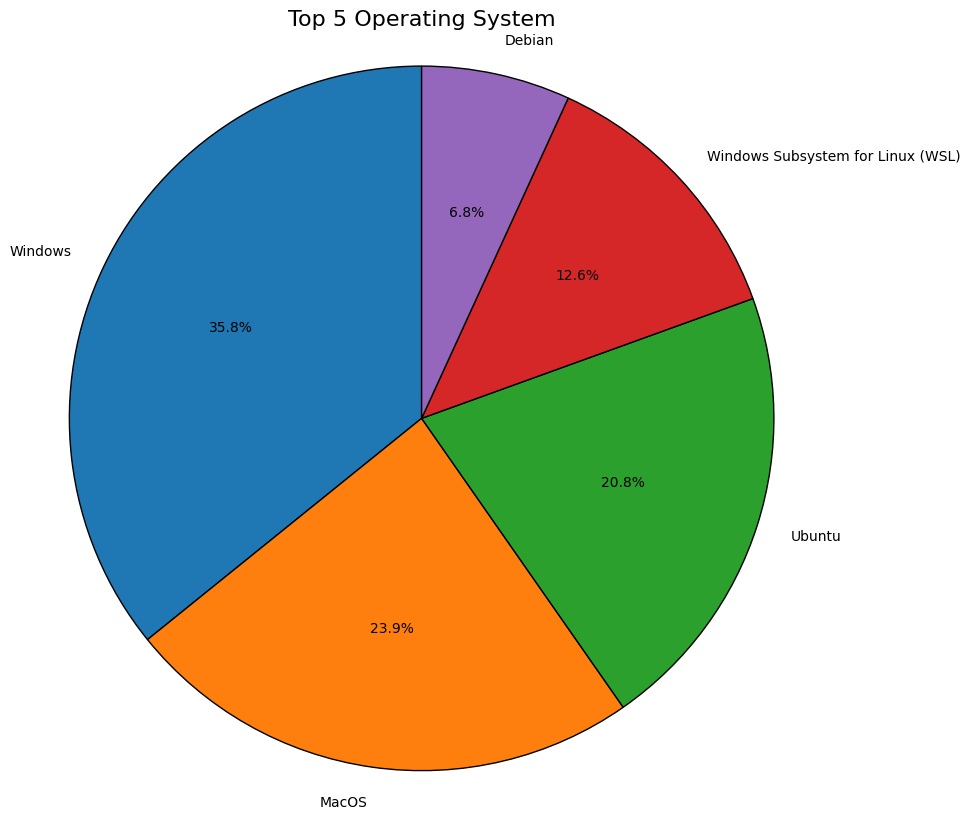

In [22]:
df['OpSysProfessional use'] = df['OpSysProfessional use'].fillna('')
df_exploded = df.assign(OS=df['OpSysProfessional use'].str.split(';')).explode('OS')
df_exploded['OS'] = df_exploded['OS'].str.strip()
df_exploded = df_exploded[df_exploded['OS'] != ''] 
df_clean = df_exploded.dropna(subset=['OS']).copy()
os_counts = df_clean['OS'].value_counts()
top_5_os = os_counts.head(5)
plt.figure(figsize=(10, 10))
plt.pie(
                top_5_os,
                labels=top_5_os.index,
                autopct='%1.1f%%',
                startangle=90,
                #colors=sns.color_palette('pastel'),
                wedgeprops={'edgecolor': 'black'}
            )
plt.title('Top 5 Operating System', fontsize=16)
plt.axis('equal')
plt.show()


### Insight
- Windows is the most widely used professional operating system, accounting for a significant 35.8% of the top 5. This highlights its enduring popularity and widespread adoption in professional development environments.
- macOS is the second most popular at 23.9%, indicating a substantial preference for Apple's ecosystem among developers. Ubuntu, a popular Linux distribution, follows closely at 20.8%, underscoring the strong presence of Linux-based systems in professional use.
- Windows Subsystem for Linux (WSL), at 12.6%, shows that a notable portion of Windows users are leveraging Linux environments within their Windows machines. Debian, another Linux distribution, makes up 6.8% of the top 5, indicating its dedicated user base.

### Task 2: Additional Visualizations and Comparisons


##### 2.1 Pie Chart for Top 5 Programming Languages Respondents Have Worked With


The `LanguageHaveWorkedWith` column contains the programming languages that respondents have experience with. We’ll plot a pie chart to display the composition of the top 5 languages.



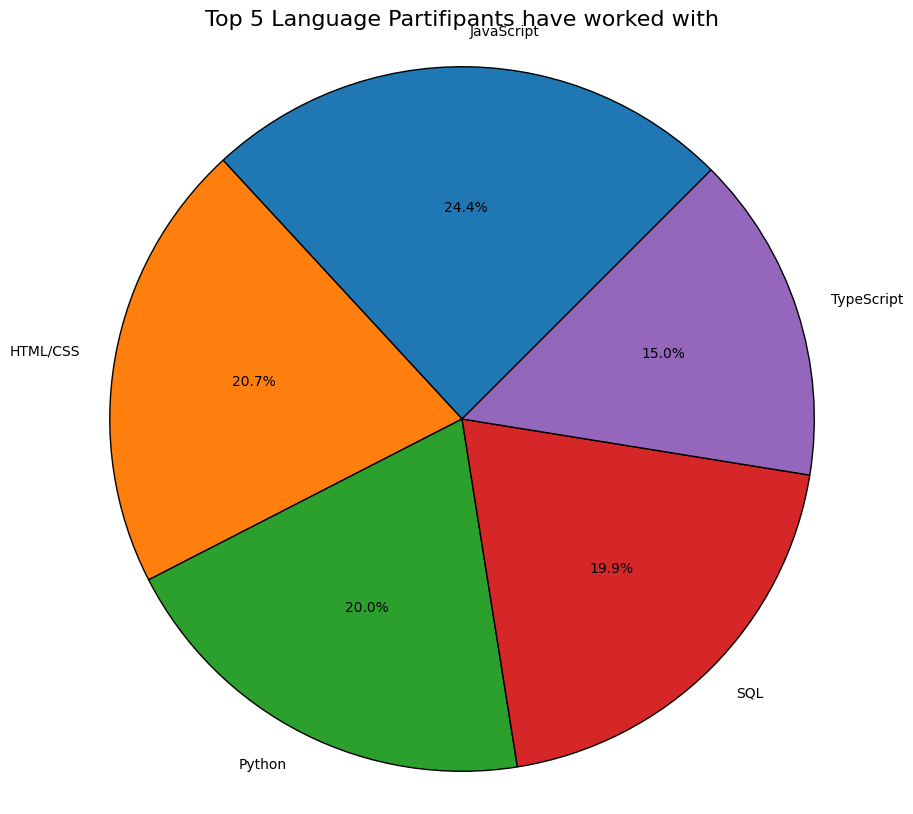

In [24]:
df['LanguageHaveWorkedWith'] = df['LanguageHaveWorkedWith'].fillna('')
df_exploded = df.assign(Language=df['LanguageHaveWorkedWith'].str.split(';')).explode('Language')
df_exploded['Language'] = df_exploded['Language'].str.strip()
df_exploded = df_exploded[df_exploded['Language'] != ''] 
df_clean = df_exploded.dropna(subset=['Language']).copy()
language_counts = df_clean['Language'].value_counts()
top_5_language = language_counts.head(5)
plt.figure(figsize=(10, 10))
plt.pie(
                top_5_language,
                labels=top_5_language.index,
                autopct='%1.1f%%',
                startangle=45,
                #colors=sns.color_palette('pastel'),
                wedgeprops={'edgecolor': 'black'}
            )
plt.title('Top 5 Language Partifipants have worked with', fontsize=16)
plt.axis('equal')
plt.show()


### Insight
- JavaScript holds the largest share at 24.4%, indicating its widespread use across the developer community.
- HTML/CSS follows closely at 20.7%, highlighting its foundational role in web development.
- Python is also a significant contender at 20.0%, showcasing its broad application in various domains.
- SQL accounts for 19.9%, demonstrating its essential role in data  management.
- TypeScript, at 15.0%, represents a growing preference for typed JavaScript.

##### 2.2 Pie Chart for Top Collaboration Tools used in Professional Use


Using the `NEWCollabToolsHaveWorkedWith` column, we’ll identify and visualize the top collaboration tools respondents use in their professional work.



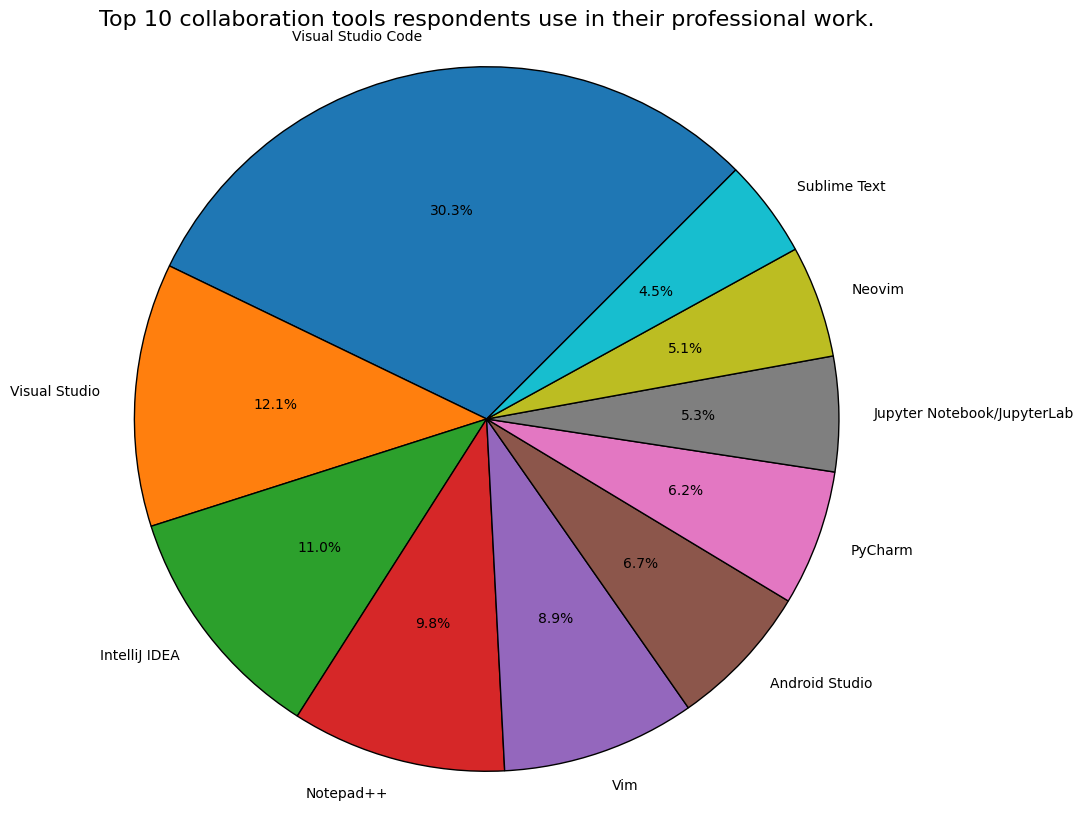

In [28]:
df['NEWCollabToolsHaveWorkedWith'] = df['NEWCollabToolsHaveWorkedWith'].fillna('')
df_exploded = df.assign(New=df['NEWCollabToolsHaveWorkedWith'].str.split(';')).explode('New')
df_exploded['New'] = df_exploded['New'].str.strip()
df_exploded = df_exploded[df_exploded['New'] != ''] 
df_clean = df_exploded.dropna(subset=['New']).copy()
new_counts = df_clean['New'].value_counts()
top_10_new_tools = new_counts.head(10)
plt.figure(figsize=(10, 10))
plt.pie(
                top_10_new_tools,
                labels=top_10_new_tools.index,
                autopct='%1.1f%%',
                startangle=45,
                #colors=sns.color_palette('pastel'),
                wedgeprops={'edgecolor': 'black'}
            )
plt.title('Top 10 collaboration tools respondents use in their professional work.', fontsize=16)
plt.axis('equal')
plt.show()

### Insight
- Visual Studio Code is the overwhelmingly most popular collaboration tool, capturing a substantial 30.3% of the top 10. This highlights its widespread adoption and preference in professional development environments.
- Visual Studio (12.1%), IntelliJ IDEA (11.0%), and Notepad++ (9.8%) also hold significant shares, indicating that these established IDEs and text editors remain highly utilized.
- The remaining tools in the top 10, including Vim (8.9%), Android Studio (6.7%), PyCharm (6.2%), Jupyter Notebook/JupyterLab (5.3%), Neovim (5.1%), and Sublime Text (4.5%), collectively represent a diverse ecosystem of specialized and general-purpose tools that cater to various developer needs.

### Task 3: Analyzing and Interpreting Composition


In this task, we will create additional pie charts to analyze specific aspects of the survey data. Use `pandas` and `matplotlib` to complete each task and interpret the findings.



##### 3.1 Pie Chart of `Respondents` Most Admired Programming Languages


The `LanguageAdmired` column lists the programming languages respondents admire most. Create a pie chart to visualize the top 5 admired languages.



| Language1   | count   |
|:------------|:--------|
| JavaScript  | 21869   |
| Python      | 20774   |
| SQL         | 20692   |
| HTML/CSS    | 19851   |
| TypeScript  | 16079   |


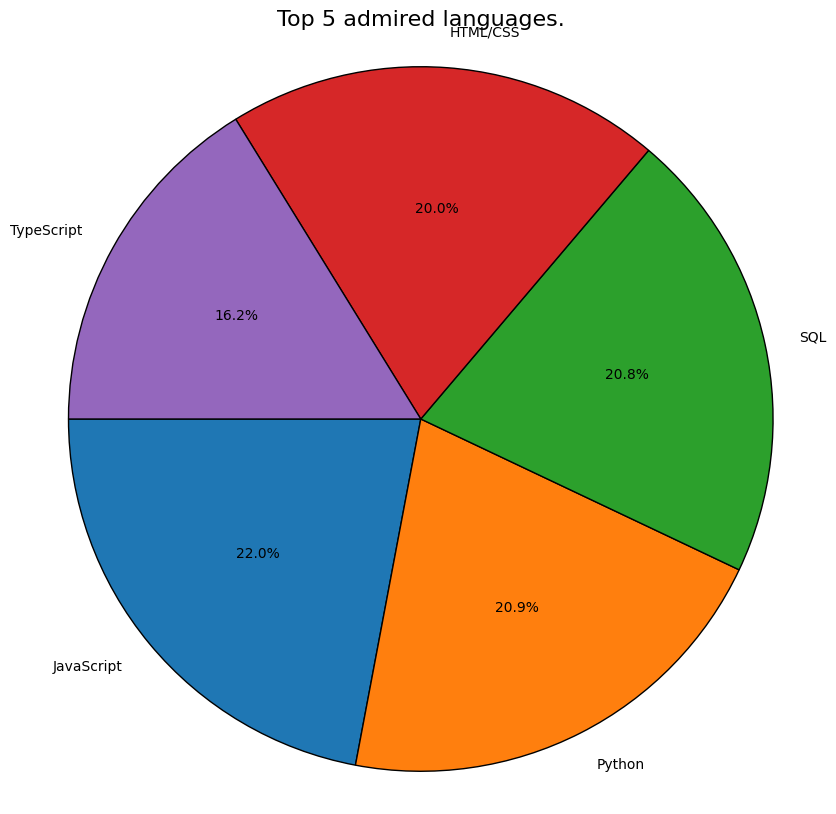

In [31]:
df['LanguageAdmired'] = df['LanguageAdmired'].fillna('')
df_exploded = df.assign(Language1=df['LanguageAdmired'].str.split(';')).explode('Language1')
df_exploded['Language1'] = df_exploded['Language1'].str.strip()
df_exploded = df_exploded[df_exploded['Language1'] != '']
df_clean = df_exploded.dropna(subset=['Language1']).copy()
language1_counts = df_clean['Language1'].value_counts()
top_5_admired_languages = language1_counts.head(5)
print(top_5_admired_languages.to_markdown(numalign="left", stralign="left"))
plt.figure(figsize=(10, 10))
plt.pie(
                top_5_admired_languages,
                labels=top_5_admired_languages.index,
                autopct='%1.1f%%',
                startangle=180,
                #colors=sns.color_palette('pastel'),
                wedgeprops={'edgecolor': 'black'}
            )
plt.title('Top 5 admired languages.', fontsize=16)
plt.axis('equal')
plt.show()

### Insight
- JavaScript holds the largest share of admiration at 22.0%, indicating its strong appeal within the developer community.
- Python and SQL are very closely admired, with 20.9% and 20.8% respectively. This highlights their significant standing and recognition among developers.
- HTML/CSS accounts for 20.0% of the admiration, emphasizing its foundational importance. TypeScript is admired by 16.2% of respondents, showcasing its growing respect.

##### 3.2 Pie Chart of Tools Used for AI Development


Using the `AIToolCurrently` Using column, create a pie chart to visualize the top 5 tools developers are currently using for AI development.



| AI_Tool                              | count   |
|:-------------------------------------|:--------|
| Writing code                         | 29486   |
| Search for answers                   | 24295   |
| Debugging and getting help           | 20404   |
| Documenting code                     | 14439   |
| Generating content or synthetic data | 12538   |


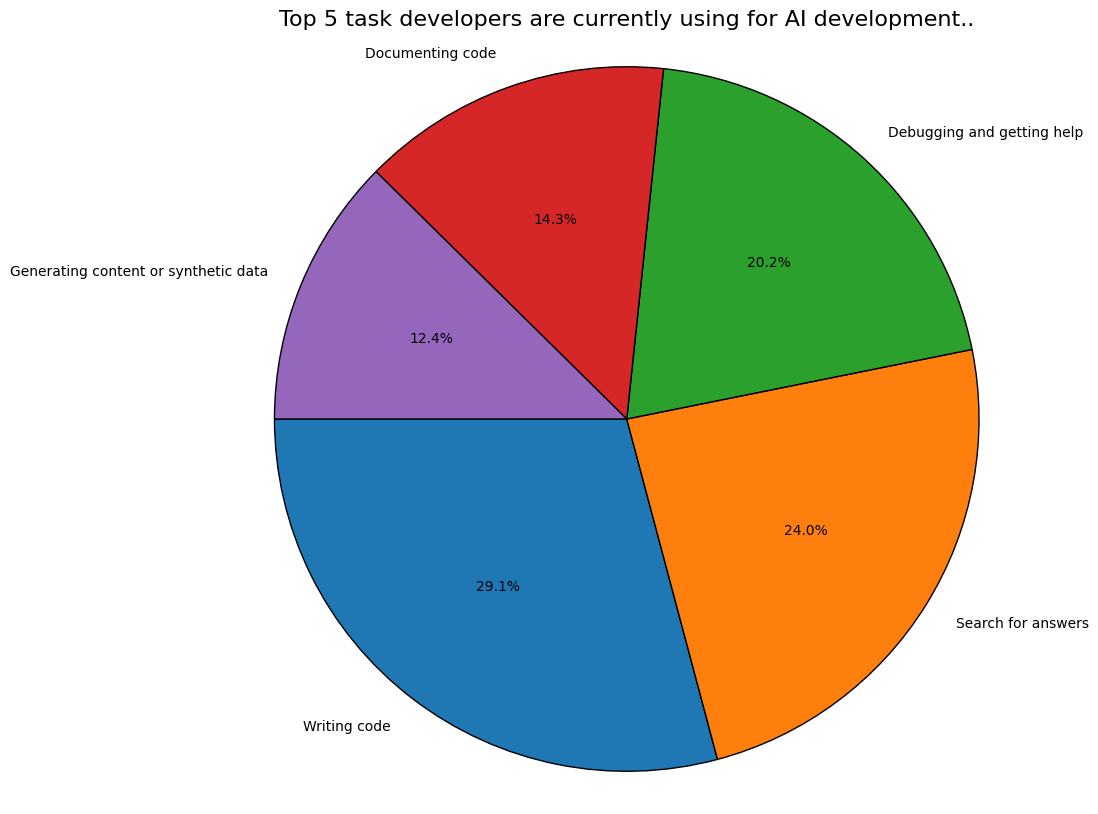

In [39]:
df['AIToolCurrently Using'] = df['AIToolCurrently Using'].fillna('')
df_exploded = df.assign(AI_Tool=df['AIToolCurrently Using'].str.split(';')).explode('AI_Tool')
df_exploded['AI_Tool'] = df_exploded['AI_Tool'].str.strip()
df_exploded = df_exploded[df_exploded['AI_Tool'] != '']
df_clean = df_exploded.dropna(subset=['AI_Tool']).copy()
AI_Tool_counts = df_clean['AI_Tool'].value_counts()
top_5_AI_Tool = AI_Tool_counts.head(5)
print(top_5_AI_Tool.to_markdown(numalign="left", stralign="left"))
plt.figure(figsize=(10, 10))
plt.pie(
                top_5_AI_Tool,
                labels=top_5_AI_Tool.index,
                autopct='%1.1f%%',
                startangle=180,
                #colors=sns.color_palette('pastel'),
                wedgeprops={'edgecolor': 'black'}
            )
plt.title('Top 5 task developers are currently using for AI development..', fontsize=16)
plt.axis('equal')
plt.show()

### Insight
- The largest share (29.1%) is dedicated to "Writing code," indicating that AI is most frequently used for code generation or assistance in the development process.
- "Search for answers" (24.0%) and "Debugging and getting help" (20.2%) collectively represent a significant portion. This suggests AI is heavily leveraged for problem-solving, information retrieval, and troubleshooting during development.
- "Documenting code" accounts for 14.3%, showing AI's utility in creating or assisting with code documentation. "Generating content or synthetic data" is 12.4%, highlighting AI's role in creating new data or content.

##### 3.3 Pie Chart for Preferred Web Frameworks


The `WebframeWantToWorkWith` column includes web frameworks that respondents are interested in working with. Visualize the top 5 frameworks in a pie chart.



| Web_Framework   | count   |
|:----------------|:--------|
| React           | 15404   |
| Node.js         | 14735   |
| Next.js         | 8507    |
| Vue.js          | 7604    |
| ASP.NET CORE    | 6905    |


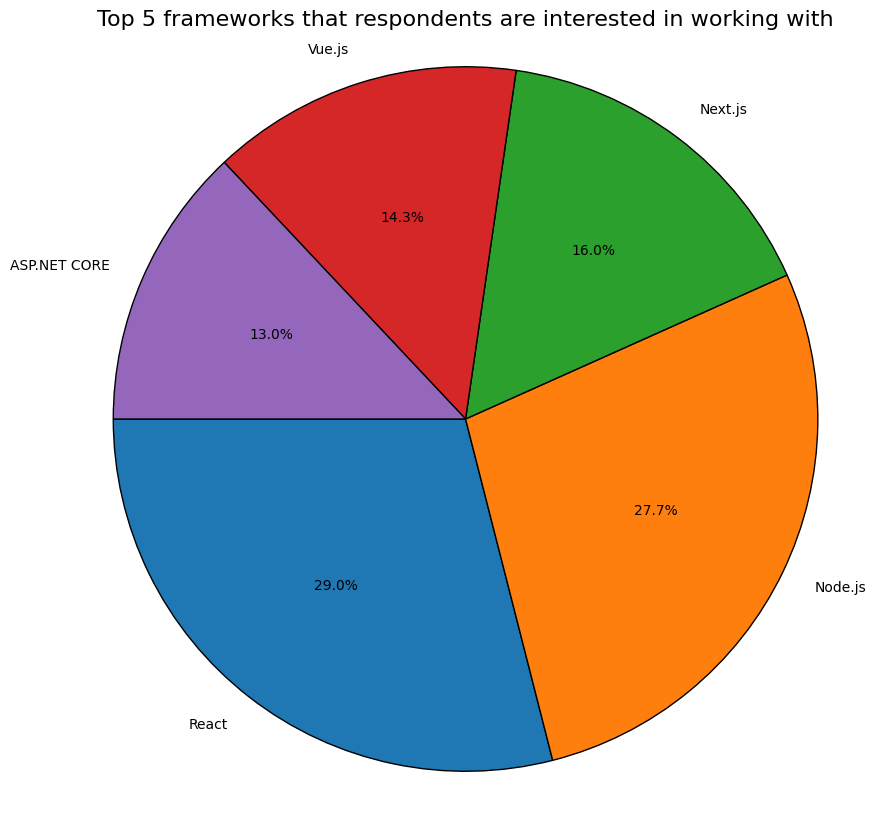

In [41]:
df['WebframeWantToWorkWith'] = df['WebframeWantToWorkWith'].fillna('')
df_exploded = df.assign(Web_Framework=df['WebframeWantToWorkWith'].str.split(';')).explode('Web_Framework')
df_exploded['Web_Framework'] = df_exploded['Web_Framework'].str.strip()
df_exploded = df_exploded[df_exploded['Web_Framework'] != '']
df_clean = df_exploded.dropna(subset=['Web_Framework']).copy()
Web_Framework_counts = df_clean['Web_Framework'].value_counts()
top_5_Web_Framework = Web_Framework_counts.head(5)
print(top_5_Web_Framework.to_markdown(numalign="left", stralign="left"))
plt.figure(figsize=(10, 10))
plt.pie(
                top_5_Web_Framework,
                labels=top_5_Web_Framework.index,
                autopct='%1.1f%%',
                startangle=180,
                #colors=sns.color_palette('pastel'),
                wedgeprops={'edgecolor': 'black'}
            )
plt.title('Top 5 frameworks that respondents are interested in working with', fontsize=16)
plt.axis('equal')
plt.show()

### Insight
- React holds the largest share at 29.0%, indicating its strong and continued appeal as a framework developers want to work with.
- Node.js is the second most desired at 27.7%, highlighting its popularity for server-side JavaScript development. Next.js follows with 16.0%, showing significant interest in this React framework.
- Vue.js accounts for 14.3% of the interest, indicating its strong community and ease of use. ASP.NET Core makes up 13.0%, representing continued interest in Microsoft's modern web framework.

##### 3.4 Pie Chart for Most Desired Embedded Technologies


Using the `EmbeddedWantToWorkWith` column, create a pie chart to show the top 5 most desired embedded technologies that respondents wish to work with.



| Embedded    | count   |
|:------------|:--------|
| Rasberry Pi | 9792    |
| Arduino     | 6482    |
| GNU GCC     | 5870    |
| CMake       | 4693    |
| Cargo       | 4567    |


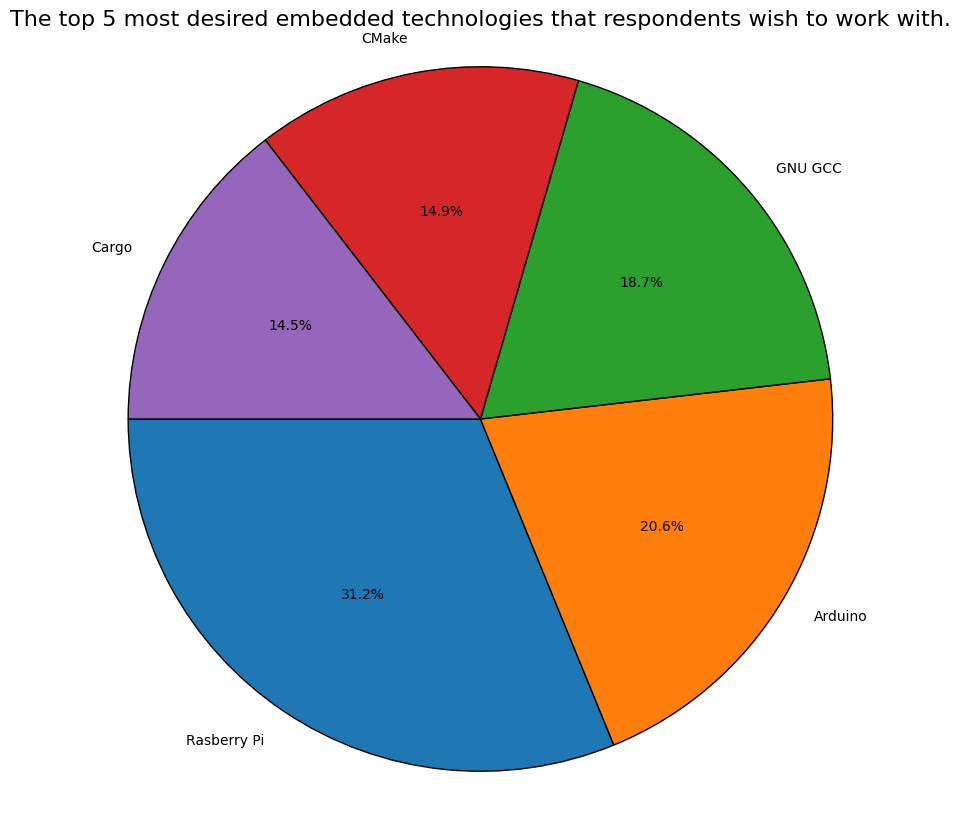

In [42]:
df['EmbeddedWantToWorkWith'] = df['EmbeddedWantToWorkWith'].fillna('')
df_exploded = df.assign(Embedded=df['EmbeddedWantToWorkWith'].str.split(';')).explode('Embedded')
df_exploded['Embedded'] = df_exploded['Embedded'].str.strip()
df_exploded = df_exploded[df_exploded['Embedded'] != '']
df_clean = df_exploded.dropna(subset=['Embedded']).copy()
Embedded_counts = df_clean['Embedded'].value_counts()
top_5_Embedded = Embedded_counts.head(5)
print(top_5_Embedded.to_markdown(numalign="left", stralign="left"))
plt.figure(figsize=(10, 10))
plt.pie(
                top_5_Embedded,
                labels=top_5_Embedded.index,
                autopct='%1.1f%%',
                startangle=180,
                #colors=sns.color_palette('pastel'),
                wedgeprops={'edgecolor': 'black'}
            )
plt.title('The top 5 most desired embedded technologies that respondents wish to work with.', fontsize=16)
plt.axis('equal')
plt.show()

### Insight
- Raspberry Pi holds the largest share, with 31.2% of respondents expressing a desire to work with it. This highlights its immense popularity as a versatile and accessible platform for embedded development.
- Arduino is the second most desired at 20.6%, indicating its strong appeal for microcontroller-based projects. GNU GCC, a crucial compiler suite, follows closely with 18.7%, underscoring its foundational importance in embedded software development.
- CMake, a cross-platform build system, accounts for 14.9% of the interest, reflecting its utility in managing complex embedded projects. Cargo, Rust's build system and package manager, is desired by 14.5% of respondents, showcasing the growing interest in Rust for embedded applications.

### Let's explore the cloud platform popularity within the participants

| Cloud                     | count   |
|:--------------------------|:--------|
| Amazon Web Services (AWS) | 22191   |
| Microsoft Azure           | 12850   |
| Google Cloud              | 11605   |
| Cloudflare                | 6974    |
| Firebase                  | 6443    |


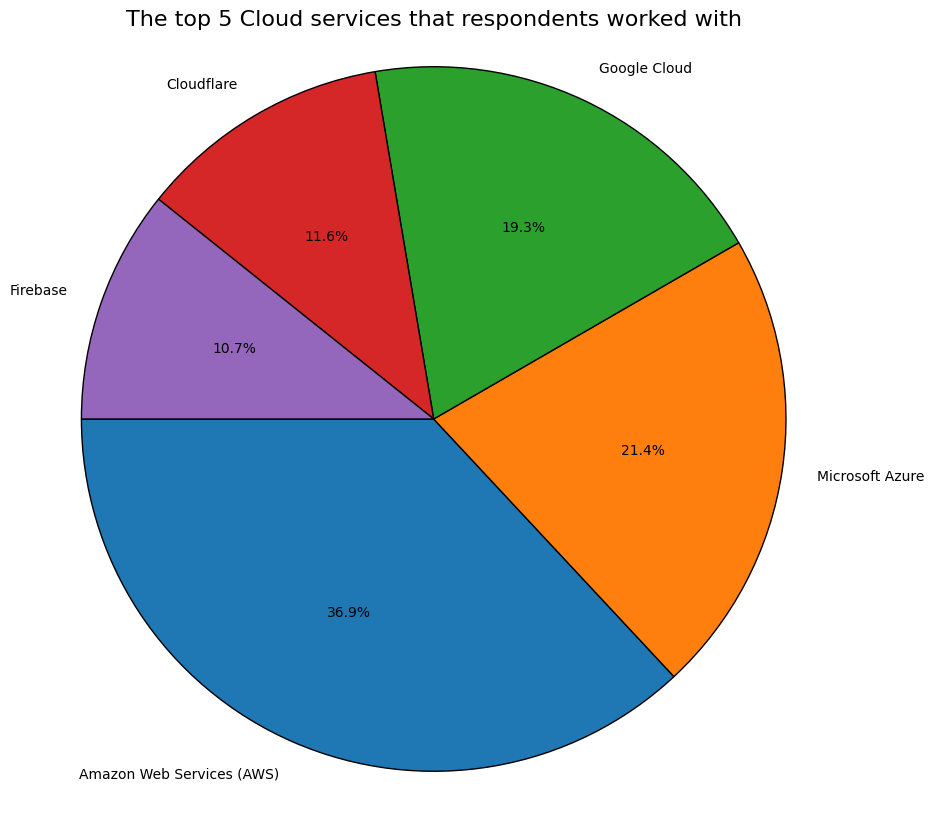

In [43]:
df['PlatformHaveWorkedWith'] = df['PlatformHaveWorkedWith'].fillna('')
df_exploded = df.assign(Cloud=df['PlatformHaveWorkedWith'].str.split(';')).explode('Cloud')
df_exploded['Cloud'] = df_exploded['Cloud'].str.strip()
df_exploded = df_exploded[df_exploded['Cloud'] != '']
df_clean = df_exploded.dropna(subset=['Cloud']).copy()
Cloud_counts = df_clean['Cloud'].value_counts()
top_5_Cloud = Cloud_counts.head(5)
print(top_5_Cloud.to_markdown(numalign="left", stralign="left"))
plt.figure(figsize=(10, 10))
plt.pie(
                top_5_Cloud,
                labels=top_5_Cloud.index,
                autopct='%1.1f%%',
                startangle=180,
                #colors=sns.color_palette('pastel'),
                wedgeprops={'edgecolor': 'black'}
            )
plt.title('The top 5 Cloud services that respondents worked with', fontsize=16)
plt.axis('equal')
plt.show()

### Insight
AWS is the clear leader among cloud services developers have worked with, followed by Microsoft Azure and Google Cloud, reflecting the current landscape dominated by these major providers. Cloudflare and Firebase also hold notable shares for specialized services.

### Summary


After completing this lab, we are be able to:
- Create pie charts to visualize developer preferences across databases, programming languages, AI tools, and cloud platforms.
- Identify trends in technology usage, role distribution, and tool adoption through pie charts.
- Analyze and compare data composition across various categories to gain insights into developer preferences.


<b>This work is done by <i>Bimal Upadhaya</i> © 2025.</b>